# Bakery Data Exploration/Apriori Market Analysis

Coded by Luna McBride

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #Plotting
%matplotlib inline

plt.rcParams['figure.figsize'] = (15,10) #Set the default figure size
plt.style.use('ggplot') #Set the plotting method

from mlxtend.frequent_patterns import apriori #Import Apriori for Market Basket Analysis
from mlxtend.frequent_patterns import association_rules #Pull Rules from Apriori

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-bread-basket/bread basket.csv


In [2]:
bread = pd.read_csv("../input/the-bread-basket/bread basket.csv") #Put the data into a dataset
bread.head() #Take a peek at the data

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


---

# Check for Nulls

In [3]:
print(bread.isnull().any()) #Check for any null values

Transaction        False
Item               False
date_time          False
period_day         False
weekday_weekend    False
dtype: bool


There are no null values in the dataset

---

# Split the DateTime Field

In [4]:
date = [] #Add a holder variable for the dates
time = [] #Add a holder variable for the times
dateTime = bread["date_time"].copy() #Get the datetime field from the dataframe

#For each datetime, split the dates and times and hold them in the holders
for dateT in dateTime:
    splitDate = dateT.split() #Split the date and time
    date.append(splitDate[0]) #Add the date to the date holder list
    time.append(splitDate[1]) #Add the time to the time holder list
    
bread["date"] = date #Put the date holder into the bread dataframe
bread["time"] = time #Put the time holder into the bread dataframe
bread = bread.drop(columns = {"date_time"}) #Drop the original datetime column
bread.head() #Take a peek at the dataset

,Transaction,Item,period_day,weekday_weekend,date,time
0,1,Bread,morning,weekend,30-10-2016,09:58
1,2,Scandinavian,morning,weekend,30-10-2016,10:05
2,2,Scandinavian,morning,weekend,30-10-2016,10:05
3,3,Hot chocolate,morning,weekend,30-10-2016,10:07
4,3,Jam,morning,weekend,30-10-2016,10:07


In [5]:
bread["date"] = pd.to_datetime(bread["date"]) #Convert the dates to pandas datetime
bread["day"] = bread["date"].dt.day_name() #Get the day from the date field
bread.head() #Take a peek at the dataset

,Transaction,Item,period_day,weekday_weekend,date,time,day
0,1,Bread,morning,weekend,2016-10-30,09:58,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07,Sunday


---

# Explore the Data

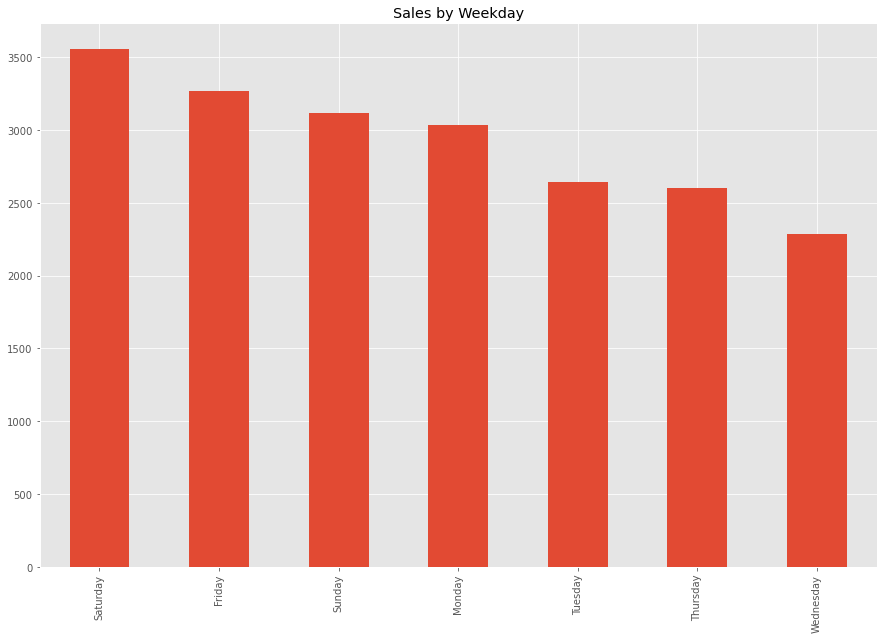

In [6]:
bread["day"].value_counts().plot.bar(title = "Sales by Weekday") #Plot the number of items sold on each weekday

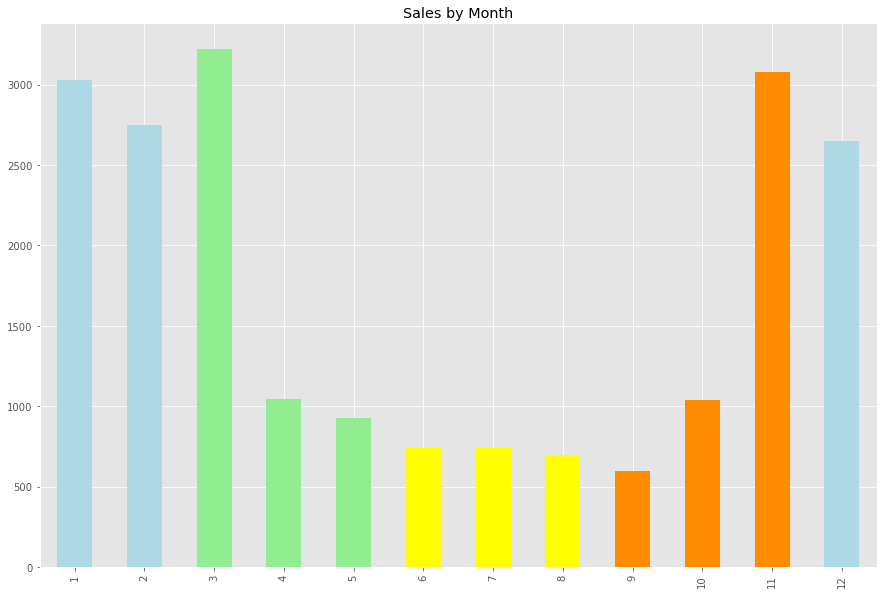

In [7]:
bread["month"] = pd.DatetimeIndex(bread["date"]).month #Get the months of the transactions
colors = [] #Add a holder list for the colors I want

#For each month, give it a color by season
for month in bread["month"].value_counts().sort_index().index:
    if month <3: #If the month is 1 or 2, thus winter
        colors.append("lightblue") #Make their color light blue, a wintery color
    elif month <6: #If the month is 3-5, thus spring
        colors.append("lightgreen") #Make their color light green, a springy color
    elif month <9: #If the month is 6-8, thus summer
        colors.append("yellow") #Make their color yellow, a summery color
    elif month <12: #If the month is 9-11, thus fall
        colors.append("darkorange") #Make their color orange, a fall-like color
    else: #Else case, handling December, and thus winter
        colors.append("lightblue") #Make december light blue
        
bread["month"].value_counts().sort_index().plot.bar(color = colors, title = "Sales by Month") #Plot the items sold by month

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e6885f050>],
      dtype=object)

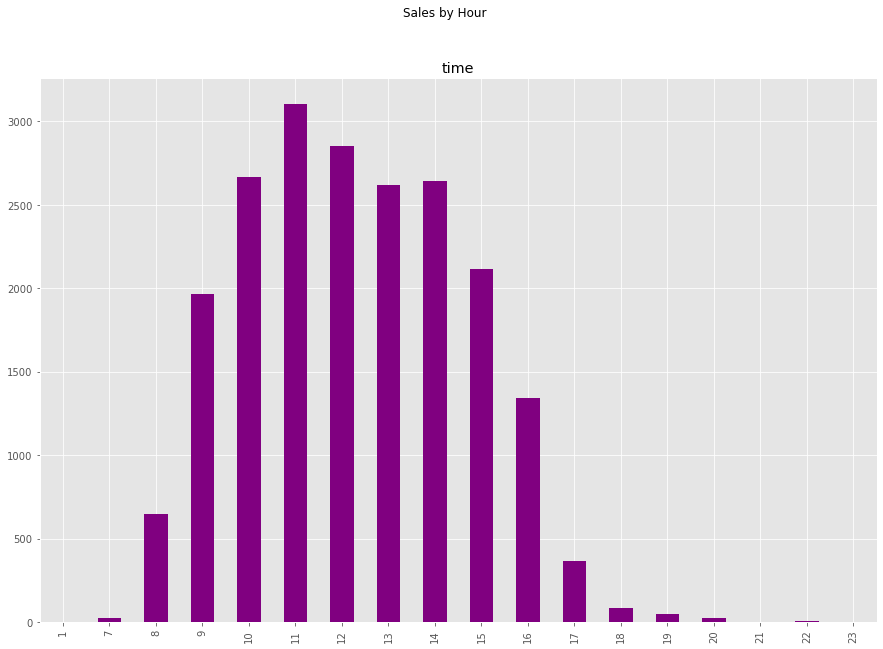

In [8]:
hour = pd.DatetimeIndex(bread["time"]).hour #Get the months of the transactions
hour.value_counts().sort_index().plot.bar(color = "purple", title = "Sales by Hour", subplots = True) #Plot the sales by hour

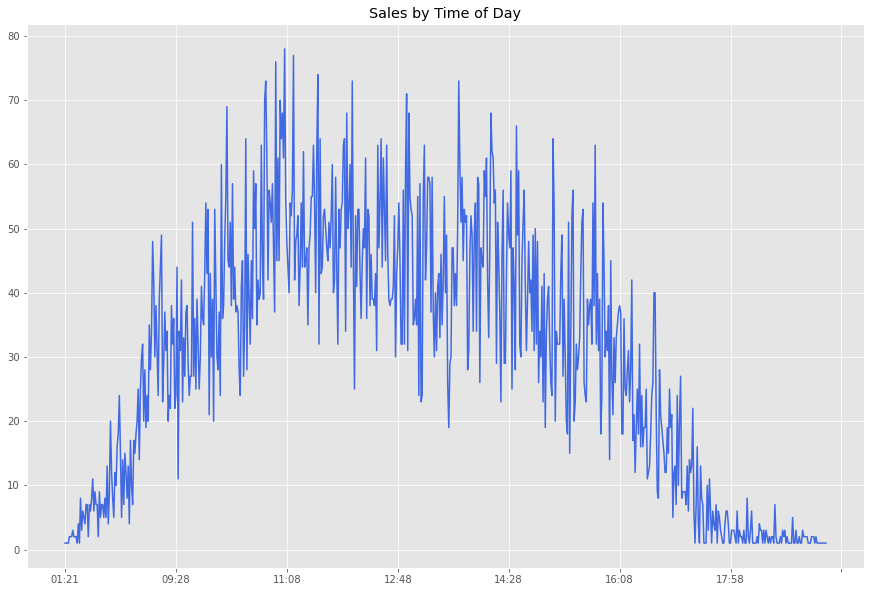

In [9]:
bread["time"].value_counts().sort_index().plot(color = "royalblue", title = "Sales by Time of Day") #Plot the transaction times

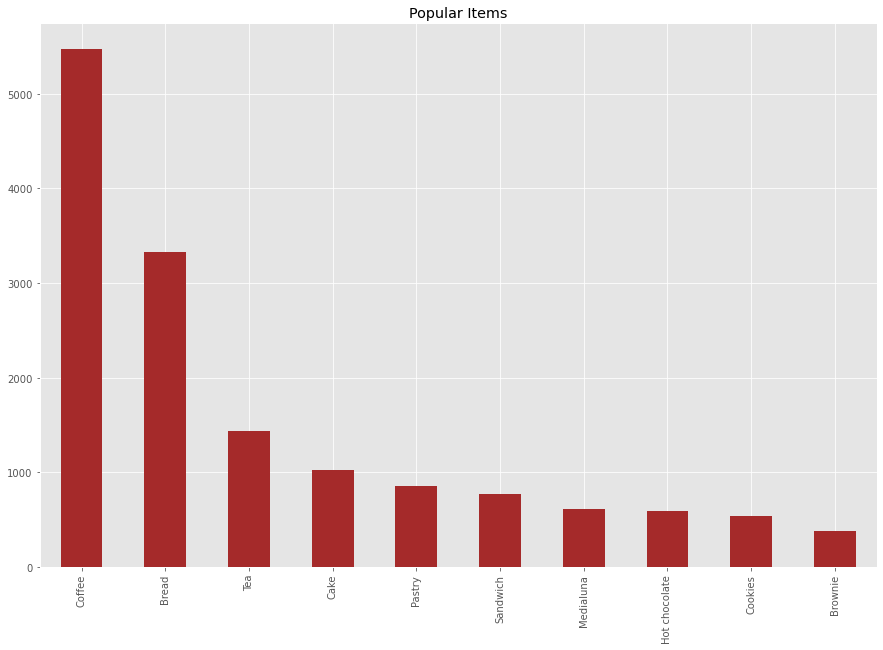

In [10]:
bread["Item"].value_counts()[:10].plot.bar(title = "Popular Items", color = "brown") #Plot the counts of the most popular items

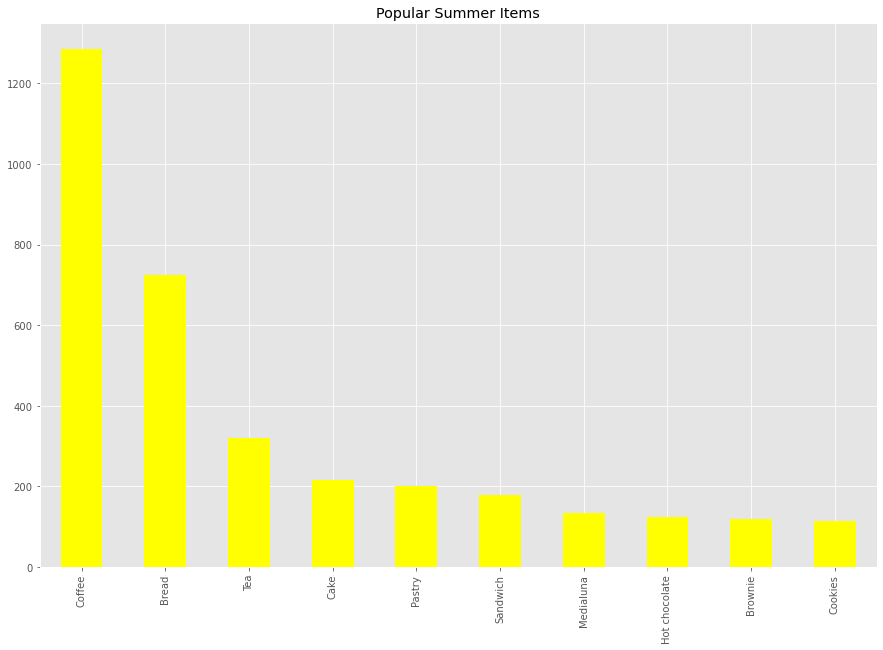

In [11]:
win = [1, 2, 3, 10, 11, 12] #A list of "winter" months
bread["sumWin"] = bread["month"].apply(
    lambda x: "Winter" if x in win else "Summer") #Add a column to the dataframe to distinuish summer and winter

bread["Item"].loc[bread["sumWin"] == "Summer"].value_counts()[:10].plot.bar(
    title = "Popular Summer Items", color = "yellow") #Plot the counts of the most popular summer items

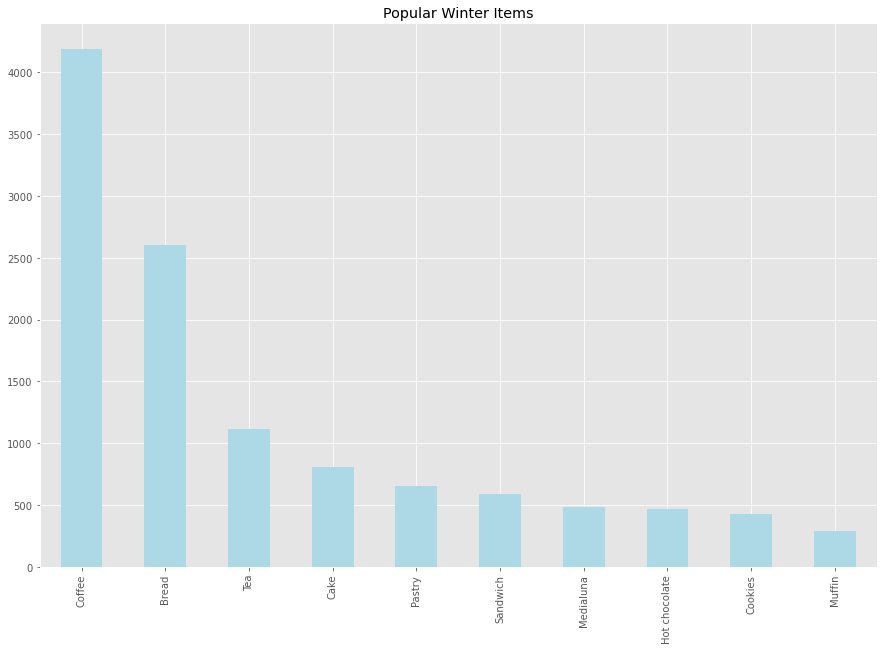

In [12]:
bread["Item"].loc[bread["sumWin"] == "Winter"].value_counts()[:10].plot.bar(
    title = "Popular Winter Items", color = "lightblue") #Plot the counts of the most popular winter items

This market has a stronger weekend clientelle, yet only by a small amount. They are most popular in the cold seasons of winter rather than the summer, with extra popularity in March and November when the cold season is just ending/starting respectively. Their most popular times are from 10-2 with a peak at 11. The most popular items are warm drinks and warm bread items, but this does not appear to differ much by time of year.

I think it is very likely this is a place to stop on the way to work and/or between college classes, given the high rise in the morning, sustained popularity midday, and disproportionately high coffee sales for a bread shop. 

---

# Market Basket Analysis

Source: https://medium.com/edureka/apriori-algorithm-d7cc648d4f1e

## Basket Formation (Item/Transaction)

In [13]:
breadBasic = bread[["Transaction", "Item"]].copy() #Take only the transaction and item fields
breadBasic["Quant"] = breadBasic["Item"].apply(lambda x: 1) #Add a quantity field so the basket will not get mad
breadBasic.head() #Take a peek at the simplified data

,Transaction,Item,Quant
0,1,Bread,1
1,2,Scandinavian,1
2,2,Scandinavian,1
3,3,Hot chocolate,1
4,3,Jam,1


In [14]:
breadBasket = (breadBasic #Pull the dataframe
               .groupby(["Transaction", "Item"])["Quant"] #Group the items and transactions together
               .sum().unstack().reset_index().fillna(0) #Create a table for the quantities of each item per transaction
               .set_index("Transaction")) #Set the index to the transactions
breadBasket.head(13) #Take a peek at the basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Encode: encodes the quantities into 0 (none in this transaction) and 1 (at least one in this transaction)
#Input: the quantity
#Output: 1 for in the transaction, 0 for not in the transaction
def encode(quant):
    if quant == 0: #If the count is already 0
        return 0 #Fill the slot with 0
    return 1 #Fill the slot with 1 to represent existence

breadBasket = breadBasket.applymap(encode) #Encode the basket
breadBasket.head(13) #Take a peek at the basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Run Apriori

In [16]:
freq = apriori(breadBasket, min_support = 0.01, use_colnames = True) #Use the Apriori Algorithm
rules = association_rules(freq, metric = "lift", min_threshold = 1) #Get the associations from the Apriori
rules = rules.sort_values("confidence", ascending = False) #Sort the rules by their confidence
rules.head(15) #Take a peek at the associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [17]:
rulesConf = rules.loc[rules["confidence"] > 0.5] #Get only the items with 50% confidence
rulesConf #Show all the 50% confident connections

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


It appears the options most sold together are coffee with pastry-type items, with the occasional two drinks together or sandwich (basically sharing a drink or getting lunch). 